



So, to start we will load all the necessary libraries we are going to use for our analysis

In [49]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR


In [50]:
#We are going to read our dataset using pandas
data2022 = pd.read_excel('C:/Users/Admin/Downloads/group2.xlsx')



data2022 = pd.read_excel('C:/Users/Admin/Downloads/group2.xlsx')
data2022.head()

,GH NO,VARIETY,PLANTING STDATE,SAREA,NAREA,APROD,APROD/M2,MPROD,MPROD/M2,JPROD,...,DPROD,DPROD/M10,JAPROD,JAPROD/M11,FEBPROD,FEBPROD/M2,MAPROD,MAPROD/M13,TOTPRO,PROD/M2
0,1,Athena,2021-05-19 00:00:00,5046.0,NaN,87784.0,17.39675,93372.0,18.504162,81401.0,...,98144.0,19.449861,96134.0,19.051526,77395.0,15.337891,92126.0,18.257233,1027655.0,203.657352
1,1,Dinara,2021-06-18 00:00:00,292.0,NaN,NaN,0.00000,3118.0,10.678082,705.0,...,2405.0,8.236301,3306.0,11.321918,235.0,0.804795,5570.0,19.075342,25706.0,88.034247
2,1,Dominica,2021-06-26 00:00:00,667.0,NaN,8725.0,13.08096,858.0,1.286357,14314.0,...,70.0,0.104948,NaN,0.000000,NaN,0.000000,NaN,0.000000,46052.0,69.043478
3,1,Gentle Trendsetter,2022-04-06 00:00:00,1272.0,NaN,NaN,0.00000,NaN,0.000000,NaN,...,11574.0,9.099057,4987.0,3.920597,11051.0,8.687893,4122.0,3.240566,56871.0,44.709906
4,1,Giselle!,2022-04-06 00:00:00,2523.0,NaN,NaN,0.00000,NaN,0.000000,NaN,...,17403.0,6.897741,19956.0,7.909631,17769.0,7.042806,16460.0,6.523979,120153.0,47.623068


To understand the data, we have to do some statistics around it

In [51]:
data= data2022.describe()
data

,GH NO,SAREA,NAREA,APROD,APROD/M2,MPROD,MPROD/M2,JPROD,JPROD/M2,JLPROD,...,DPROD,DPROD/M10,JAPROD,JAPROD/M11,FEBPROD,FEBPROD/M2,MAPROD,MAPROD/M13,TOTPRO,PROD/M2
count,110.000000,108.000000,6.000000,90.000000,107.000000,88.000000,107.000000,93.000000,107.000000,94.000000,...,98.000000,107.000000,95.000000,107.000000,102.000000,108.000000,101.00000,108.000000,1.040000e+02,104.000000
mean,14.890909,2987.675926,3154.000000,33048.733333,7.910180,41009.965909,9.475796,29864.720430,7.816736,31562.702128,...,30144.683673,7.802420,28062.957895,7.189972,26870.176471,7.729730,28362.00000,8.732128,3.334863e+05,98.237842
std,8.454243,2150.492710,1544.648309,33571.914168,5.527145,42290.769507,7.106904,28299.259963,5.266710,29658.997988,...,34434.740139,5.777885,32658.489609,5.261042,27020.088454,4.719484,32018.11188,6.149254,3.423134e+05,50.697126
min,1.000000,288.000000,1263.000000,0.000000,0.000000,447.000000,0.000000,217.000000,0.000000,630.000000,...,0.000000,0.000000,102.000000,0.000000,20.000000,0.000000,68.00000,0.000000,6.713000e+03,3.961157
25%,7.000000,1529.750000,2523.000000,14208.000000,4.275938,17581.250000,5.971464,13163.000000,3.466146,12162.250000,...,10223.000000,3.425684,9607.500000,3.496136,11070.000000,4.865048,10180.00000,4.854935,1.204230e+05,63.970087
50%,15.000000,2523.000000,2523.000000,23192.000000,8.054697,26241.000000,9.032699,22199.000000,7.633943,22914.000000,...,19005.000000,7.520016,19819.000000,7.422513,17874.500000,7.041951,18062.00000,7.931233,2.573595e+05,94.067505
75%,22.750000,3807.500000,4415.250000,34099.250000,11.502729,47940.750000,13.184871,34480.000000,11.404182,42475.750000,...,38923.250000,11.420689,30240.000000,9.569362,32246.250000,10.734943,33961.00000,11.879608,4.227458e+05,125.424557
max,28.000000,10728.000000,5046.000000,157948.000000,21.414265,234461.000000,36.079686,137309.000000,21.460270,162469.000000,...,193925.000000,24.271676,190070.000000,31.048611,159749.000000,24.231074,229775.00000,27.545139,2.109597e+06,248.485136


In [52]:
data.shape

(8, 29)

From this data, we can see;
1. There are 28 green houses with the maximum covering an area of 10728m2
2. The highest production registered in that year was in May with a total of 234,461 stems produced. This was closely followed by March with a total of 229,775
3. The least production was experienced in February with a total of 20 stems produced.


In [53]:
#let's find informatiojn about the number of columns and type of data we are dealing with
data2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GH NO            110 non-null    int64  
 1   VARIETY          110 non-null    object 
 2   PLANTING STDATE  107 non-null    object 
 3   SAREA            108 non-null    float64
 4   NAREA            6 non-null      float64
 5   APROD            90 non-null     float64
 6   APROD/M2         107 non-null    float64
 7   MPROD            88 non-null     float64
 8   MPROD/M2         107 non-null    float64
 9   JPROD            93 non-null     float64
 10  JPROD/M2         107 non-null    float64
 11  JLPROD           94 non-null     float64
 12  JLPROD/M2        107 non-null    float64
 13  AUPROD           97 non-null     float64
 14  AUPROD/M2        107 non-null    float64
 15  SEPROD           97 non-null     float64
 16  SEPROD/M2        107 non-null    float64
 17  OCPROD          

This data has a total of 31 columns and it includes integers, float, and object. Shis means we will have to manipulate our data to int before we train and test. 

In [54]:
#We are going to check if our data has missing values
data2022.isnull().sum()

GH NO                0
VARIETY              0
PLANTING STDATE      3
SAREA                2
NAREA              104
APROD               20
APROD/M2             3
MPROD               22
MPROD/M2             3
JPROD               17
JPROD/M2             3
JLPROD              16
JLPROD/M2            3
AUPROD              13
AUPROD/M2            3
SEPROD              13
SEPROD/M2            3
OCPROD              10
OCPROD/M2            3
NPROD               12
NPROD/M2             3
DPROD               12
DPROD/M10            3
JAPROD              15
JAPROD/M11           3
FEBPROD              8
FEBPROD/M2           2
MAPROD               9
MAPROD/M13           2
TOTPRO               6
PROD/M2              6
dtype: int64

Only two columns the GH NO and VARIETY have no missing values. So, we will have to handle the missing data approprietly. lets fill the missing data with zeros

In [55]:
data = data2022.fillna(0)
data.head()

,GH NO,VARIETY,PLANTING STDATE,SAREA,NAREA,APROD,APROD/M2,MPROD,MPROD/M2,JPROD,...,DPROD,DPROD/M10,JAPROD,JAPROD/M11,FEBPROD,FEBPROD/M2,MAPROD,MAPROD/M13,TOTPRO,PROD/M2
0,1,Athena,2021-05-19 00:00:00,5046.0,0.0,87784.0,17.39675,93372.0,18.504162,81401.0,...,98144.0,19.449861,96134.0,19.051526,77395.0,15.337891,92126.0,18.257233,1027655.0,203.657352
1,1,Dinara,2021-06-18 00:00:00,292.0,0.0,0.0,0.00000,3118.0,10.678082,705.0,...,2405.0,8.236301,3306.0,11.321918,235.0,0.804795,5570.0,19.075342,25706.0,88.034247
2,1,Dominica,2021-06-26 00:00:00,667.0,0.0,8725.0,13.08096,858.0,1.286357,14314.0,...,70.0,0.104948,0.0,0.000000,0.0,0.000000,0.0,0.000000,46052.0,69.043478
3,1,Gentle Trendsetter,2022-04-06 00:00:00,1272.0,0.0,0.0,0.00000,0.0,0.000000,0.0,...,11574.0,9.099057,4987.0,3.920597,11051.0,8.687893,4122.0,3.240566,56871.0,44.709906
4,1,Giselle!,2022-04-06 00:00:00,2523.0,0.0,0.0,0.00000,0.0,0.000000,0.0,...,17403.0,6.897741,19956.0,7.909631,17769.0,7.042806,16460.0,6.523979,120153.0,47.623068


Now, after handling the missing data, I will be performing feature engineering. From my data, it is majorly about the monthly production data. So, I want to categorize it into quarterly for the full year. So, I will create additional columns for this.
1st quarter= QUARTER1
2nd quarter = QUARTER2
3RD quarter = QUARTER3

I will also create additional columns for first half and second half of the year
1st half = FIRSTHA
2nd Half = SECONDHA

In [56]:

data['QUARTER1']=data['APROD']+ data['MPROD']+ data['JPROD']+1
data['QUARTER2']=data['JLPROD']+ data['AUPROD']+ data['SEPROD']+1
data['QUARTER3']=data['OCPROD']+ data['NPROD']+ data['DPROD']+1
data['QUARTER4']=data['JAPROD']+ data['FEBPROD']+ data['MAPROD']+1
data['FIRSTHA']=data['APROD']+ data['MPROD']+ data['JPROD']+ data['JLPROD']+ data['AUPROD']+ data['SEPROD']+1
data['SECONDHA']=data['OCPROD']+ data['NPROD']+ data['DPROD']+ data['JAPROD']+ data['FEBPROD']+ data['MAPROD']+1
data.head()

,GH NO,VARIETY,PLANTING STDATE,SAREA,NAREA,APROD,APROD/M2,MPROD,MPROD/M2,JPROD,...,MAPROD,MAPROD/M13,TOTPRO,PROD/M2,QUARTER1,QUARTER2,QUARTER3,QUARTER4,FIRSTHA,SECONDHA
0,1,Athena,2021-05-19 00:00:00,5046.0,0.0,87784.0,17.39675,93372.0,18.504162,81401.0,...,92126.0,18.257233,1027655.0,203.657352,262558.0,213304.0,286141.0,265656.0,475861.0,551796.0
1,1,Dinara,2021-06-18 00:00:00,292.0,0.0,0.0,0.00000,3118.0,10.678082,705.0,...,5570.0,19.075342,25706.0,88.034247,3824.0,4979.0,7795.0,9112.0,8802.0,16906.0
2,1,Dominica,2021-06-26 00:00:00,667.0,0.0,8725.0,13.08096,858.0,1.286357,14314.0,...,0.0,0.000000,46052.0,69.043478,23898.0,10003.0,12154.0,1.0,33900.0,12154.0
3,1,Gentle Trendsetter,2022-04-06 00:00:00,1272.0,0.0,0.0,0.00000,0.0,0.000000,0.0,...,4122.0,3.240566,56871.0,44.709906,1.0,13391.0,23322.0,20161.0,13391.0,43482.0
4,1,Giselle!,2022-04-06 00:00:00,2523.0,0.0,0.0,0.00000,0.0,0.000000,0.0,...,16460.0,6.523979,120153.0,47.623068,1.0,21849.0,44121.0,54186.0,21849.0,98306.0


After the feature enginnering, we can now proceed to data analysis and visualization

In [57]:
#Which variety was produced highest in QUARTER1
Top_varieties=data.groupby('VARIETY')["QUARTER1"].sum()

best_varieties=Top_varieties.sort_values(ascending=False)
best_varieties.head(10)

VARIETY
Athena              778396.0
Aqua!               699641.0
Moonwalk            578615.0
Furiosa             547761.0
Tropical Amazone    457447.0
Belle Rose          392204.0
Madam Red           372604.0
Reflex              348398.0
Snowflake           313319.0
Madam Cerise        291038.0
Name: QUARTER1, dtype: float64

In [58]:
#Which variety was produced highest in QUARTER2
Top_varieties=data.groupby('VARIETY')["QUARTER2"].sum()

best_varieties=Top_varieties.sort_values(ascending=False)
best_varieties.head(10)

VARIETY
Athena              671710.0
Aqua!               485503.0
Moonwalk            478215.0
Furiosa             397982.0
Tropical Amazone    392101.0
Belle Rose          375238.0
Bombastic           369526.0
Snowflake           346322.0
Reflex              320039.0
Madam Cerise        296303.0
Name: QUARTER2, dtype: float64

In [59]:
#Which GH NO had the lowest produce in QUARTER2
green_house=data.groupby('GH NO')["TOTPRO"].sum()

bottom_green_house=green_house.sort_values(ascending=True)
bottom_green_house.head()

GH NO
24    436664.0
23    744171.0
2     842295.0
10    879728.0
26    884004.0
Name: TOTPRO, dtype: float64

GH NO 24, had the lowest in Total production with a total of 436,664 stems

In [60]:
#Which GH NO had the highest produce in QUARTER2
green_house=data.groupby('GH NO')["TOTPRO"].sum()

top_green_house=green_house.sort_values(ascending=False)
top_green_house.head()

GH NO
11    2109597.0
15    1874602.0
13    1803383.0
17    1670967.0
7     1593814.0
Name: TOTPRO, dtype: float64

1. GH NO 11 had the highest production with 2,109,597 stems in production folowed closely by GH NO 15
2. Only 21 Greenhouses had a total production of over 1 million in that year

In [61]:
#Which GH NO had the lowest produce in QUARTER2
green_house=data.groupby('GH NO')["QUARTER2"].sum()

bottom_green_house=green_house.sort_values(ascending=True)
bottom_green_house.head()

GH NO
24    100394.0
23    166170.0
9     179511.0
2     194989.0
26    210814.0
Name: QUARTER2, dtype: float64

In [62]:
#Which variety was produced highest in QUARTER3
Top_varieties=data.groupby('VARIETY')["QUARTER3"].sum()

best_varieties=Top_varieties.sort_values(ascending=False)
best_varieties.head()

VARIETY
Athena              843358.0
Madam Red           553385.0
Moonwalk            494940.0
Snowflake           408998.0
Tropical Amazone    389270.0
Name: QUARTER3, dtype: float64

In [63]:
#Which variety was produced highest in QUARTER3
Top_varieties=data.groupby('VARIETY')["QUARTER3"].sum()

best_varieties=Top_varieties.sort_values(ascending=False)
best_varieties.head()

VARIETY
Athena              843358.0
Madam Red           553385.0
Moonwalk            494940.0
Snowflake           408998.0
Tropical Amazone    389270.0
Name: QUARTER3, dtype: float64

In [64]:
#Which variety was produced highest in terms of Area covered per meter squared
Top_GH=data.groupby('VARIETY')["SAREA"].sum()

best_varieties=Top_GH.sort_values(ascending=False)
best_varieties.head(10)

VARIETY
Madam Red           15774.0
Furiosa             15142.0
Athena              15138.0
Bombastic           14177.0
Aqua!               13426.0
Snowflake           12615.0
Moonwalk            12615.0
Tropical Amazone    10182.0
Belle Rose          10092.0
Dinara               9886.0
Name: SAREA, dtype: float64

1. Madam Red was produced highest covering a total of 15,774m2

In [65]:
#Which green house had the highest produce in FIRSTHA
green_house=data.groupby('GH NO')["FIRSTHA"].sum()

Top_green_house=green_house.sort_values(ascending=False)
Top_green_house.head()

GH NO
15    1036288.0
11     974243.0
17     897778.0
13     886426.0
14     834098.0
Name: FIRSTHA, dtype: float64

In [66]:
#Which green house had the least produce in FIRSTHA
green_house=data.groupby('GH NO')["FIRSTHA"].sum()

bottom_green_house=green_house.sort_values(ascending=True)
bottom_green_house.head()

GH NO
24    179024.0
23    387018.0
2     423239.0
26    447643.0
6     465602.0
Name: FIRSTHA, dtype: float64

In [67]:
#Which green house had the highest produce in SECONDHA
green_house=data.groupby('GH NO')["SECONDHA"].sum()

Top_green_house=green_house.sort_values(ascending=False)
Top_green_house.head(10)

GH NO
11    1135356.0
13     916969.0
15     838322.0
17     773197.0
9      759641.0
16     744319.0
27     744045.0
1      728921.0
7      726698.0
8      667895.0
Name: SECONDHA, dtype: float64

In [68]:
#Which variety was produced highest in SECONDHA
Top_varieties=data.groupby('VARIETY')["SECONDHA"].sum()

best_varieties=Top_varieties.sort_values(ascending=False)
best_varieties.head(10)

VARIETY
Athena              1687152.0
Madam Red           1185626.0
Moonwalk             880068.0
Snowflake            847933.0
Furiosa              707241.0
Belle Rose           691183.0
Tropical Amazone     668320.0
Reflex               661176.0
Aqua!                600963.0
Dinara               569781.0
Name: SECONDHA, dtype: float64

In [69]:
#Which green house had the highest produce in SECONDHA
green_house=data.groupby('GH NO')["SECONDHA"].sum()

Top_green_house=Top_varieties.sort_values(ascending=False)
Top_green_house.head(10)

VARIETY
Athena              1687152.0
Madam Red           1185626.0
Moonwalk             880068.0
Snowflake            847933.0
Furiosa              707241.0
Belle Rose           691183.0
Tropical Amazone     668320.0
Reflex               661176.0
Aqua!                600963.0
Dinara               569781.0
Name: SECONDHA, dtype: float64

In [70]:
TOP_PERFORMER= data.nlargest(5, 'SAREA')
print('top 5 Varieties in production in terms of SAREA:',TOP_PERFORMER)

top 5 Varieties in production in terms of SAREA:     GH NO           VARIETY      PLANTING STDATE    SAREA   NAREA     APROD  \
58     16        Madam Red   11/8/2014&11/7/2022  10728.0     0.0   88783.0   
57     15  Tropical Amazone  2014-10-13 00:00:00  10182.0     0.0  155137.0   
31      9           Furiosa  2013-12-18 00:00:00  10096.0  5046.0  104079.0   
38     11           Athena   2019-08-16 00:00:00  10092.0     0.0  157948.0   
40     12          Moonwalk  2020-09-06 00:00:00   7569.0     0.0  118383.0   

     APROD/M2     MPROD   MPROD/M2     JPROD  ...    MAPROD  MAPROD/M13  \
58   8.275820  193351.0  18.023024   90468.0  ...   92790.0    8.649329   
57  15.236398  165000.0  16.205068  137309.0  ...   98896.0    9.712827   
31  10.308934  149675.0  14.825178   52707.0  ...       0.0    0.000000   
38  15.650813  234461.0  23.232362  123428.0  ...  229775.0   22.768034   
40  15.640507  105552.0  13.945303  106123.0  ...   69782.0    9.219448   

       TOTPRO     PROD/M2

In [71]:
#least performing varieties and there surface area 
bottom_10= data.nsmallest(10, 'SAREA')
print('bottom 10 Varieties in production:',bottom_10)

bottom 10 Varieties in production:     GH NO              VARIETY      PLANTING STDATE  SAREA  NAREA   APROD  \
33     10        Flinders Lane                    0    0.0    0.0     0.0   
69     19  Mansfield Pink Park                    0    0.0    0.0     0.0   
65     18               Gelato  2019-07-10 00:00:00  288.0    0.0     0.0   
1       1               Dinara  2021-06-18 00:00:00  292.0    0.0     0.0   
5       1               Trials  2022-06-01 00:00:00  292.0    0.0     0.0   
50     14             Charlize  2022-04-25 00:00:00  292.0    0.0     0.0   
53     14            Princessa  2022-10-19 00:00:00  340.0    0.0     0.0   
88     24              Borneo!                    0  356.0    0.0     0.0   
23      6            Mimi Eden  2021-02-17 00:00:00  576.0    0.0   564.0   
73     20               Dinara  2019-04-10 00:00:00  576.0    0.0  5522.0   

    APROD/M2    MPROD   MPROD/M2    JPROD  ...   MAPROD  MAPROD/M13    TOTPRO  \
33  0.000000      0.0   0.000000    

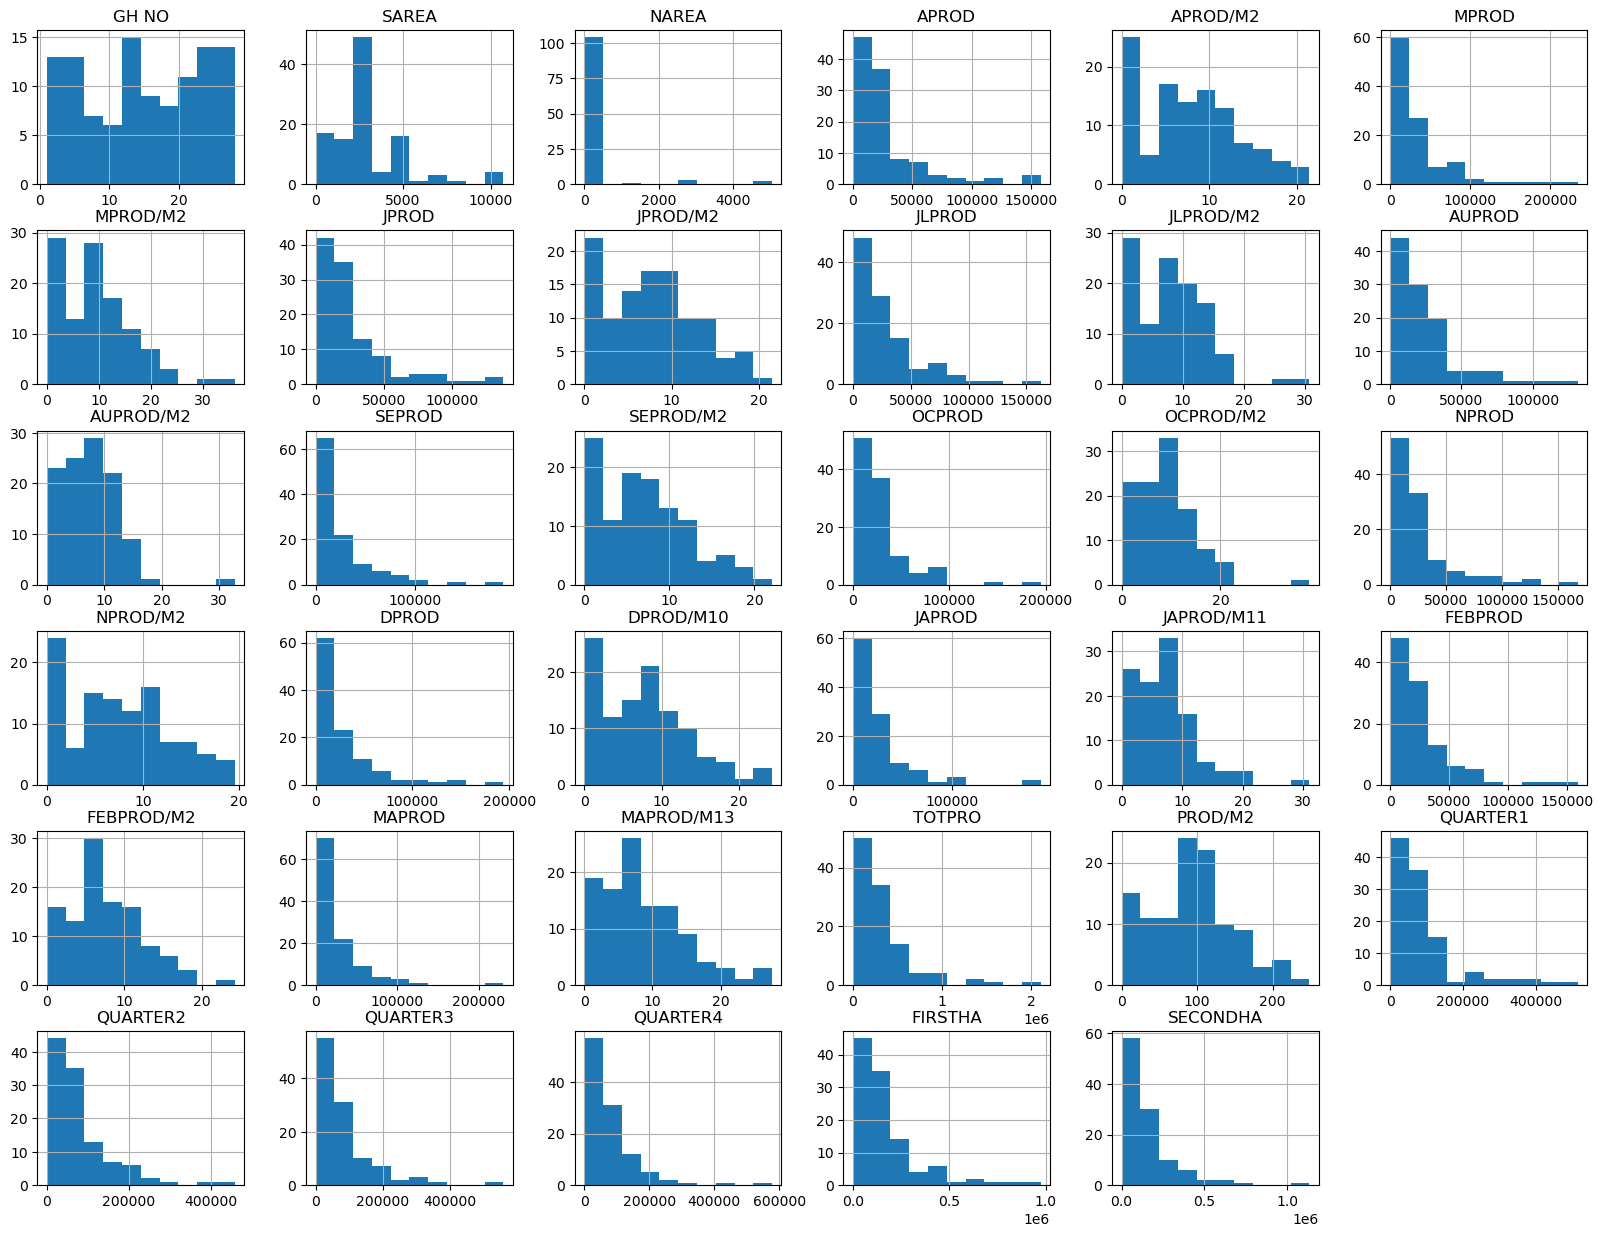

In [72]:
data.hist(figsize=(20, 15))
plt.show()

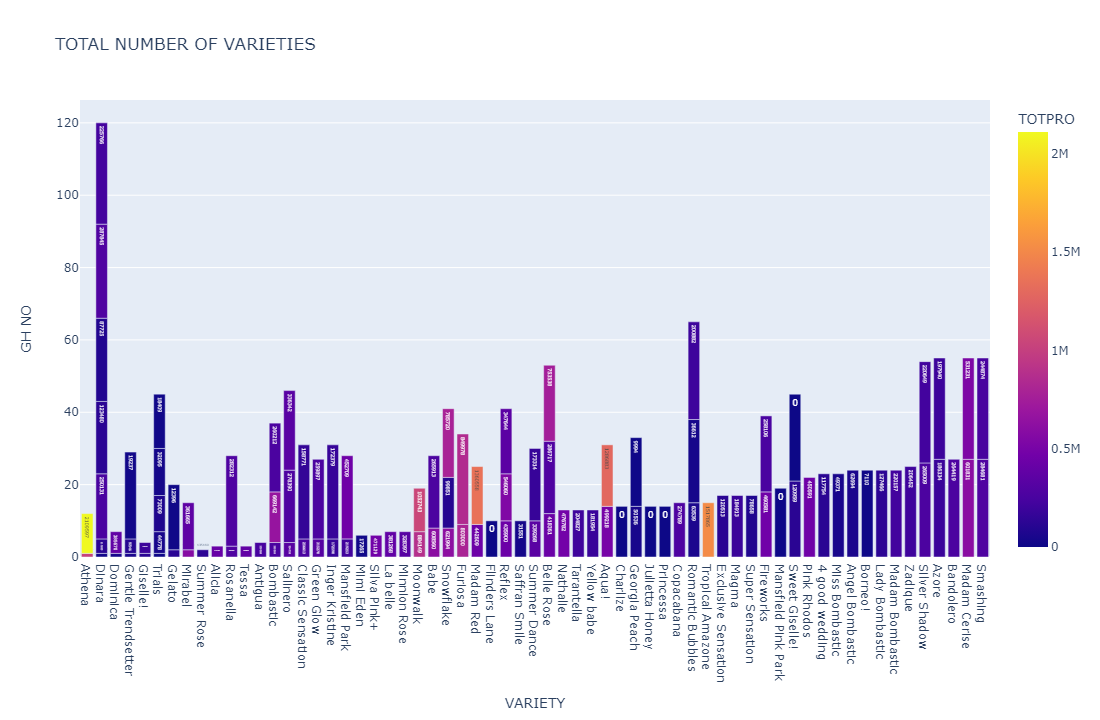

In [73]:
#bar of total number of varieties per greenhouse in terms of total production
fig=px.bar(data, x='VARIETY', y='GH NO', labels="TOTPRO: Total number of varieties", barmode='group', text='TOTPRO', title='TOTAL NUMBER OF VARIETIES', color='TOTPRO')
fig.show()

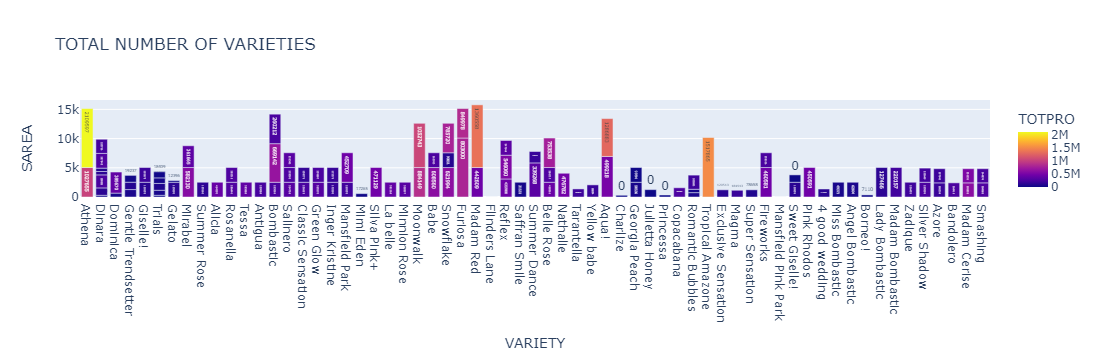

In [74]:
#TOTAL NUMBER OF VARIETIES IN TOTAL PRODUCTION IN TERMS OF SAREA
fig=px.bar(data, x='VARIETY', y='SAREA', labels="TOTPRO: Total number of varieties", barmode='group', text='TOTPRO', title='TOTAL NUMBER OF VARIETIES', color='TOTPRO')
fig.show()

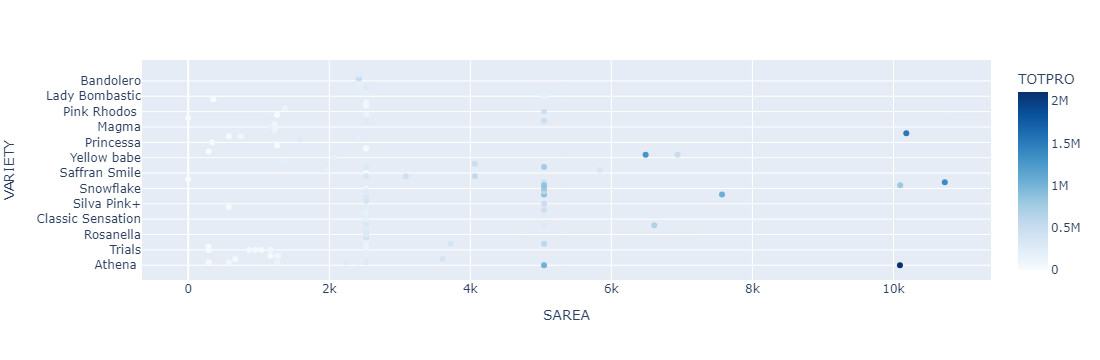

In [75]:
fig = px.scatter(data, x="SAREA", y="VARIETY", color=data['TOTPRO'],  color_continuous_scale='Blues')
fig.update_layout(legend_title_text='TOTPRO')

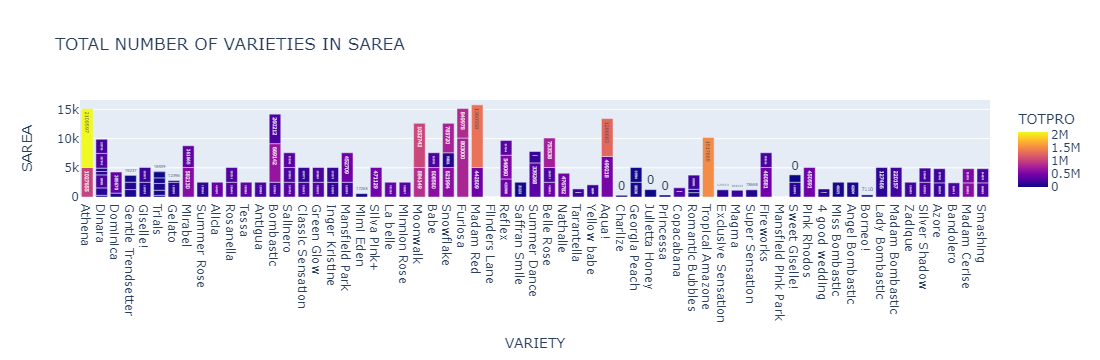

In [76]:
fig=px.bar(data, x='VARIETY', y='SAREA', labels="TOTPRO: Total number of varieties", barmode='group', text='TOTPRO', title='TOTAL NUMBER OF VARIETIES IN SAREA', color='TOTPRO')
fig.show()

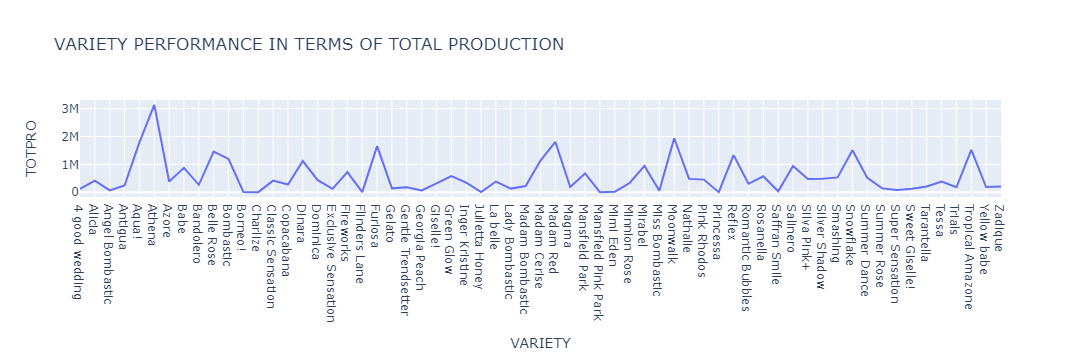

In [77]:
variety_performance=data.groupby('VARIETY')['TOTPRO'].sum().reset_index()

fig=px.line(variety_performance, x='VARIETY', y='TOTPRO', title='VARIETY PERFORMANCE IN TERMS OF TOTAL PRODUCTION')
fig.show()

Insights
1. The highest produced variet in terms of total production is Athena with 3.137252 million, followed closely with moonwalk and Madam Red
2. The least produced variety is Borneo! with a total of 7110

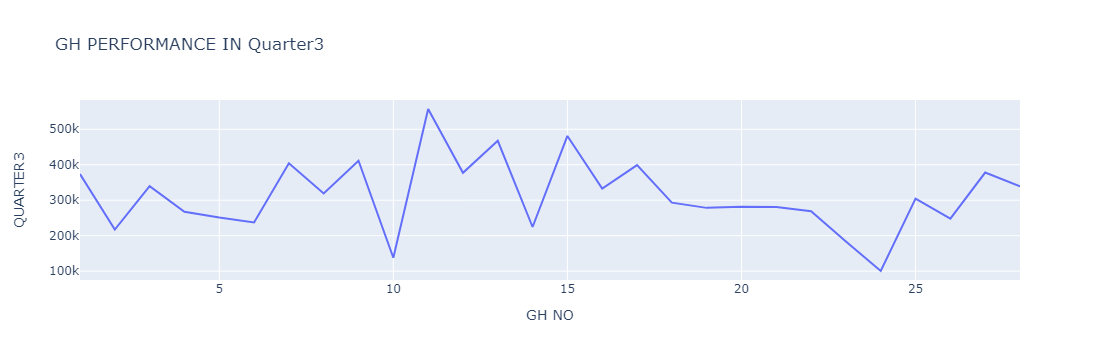

In [78]:
#GH PERFORMANCE IN TERMS OF PRODUCTION IN QUARTER 3
variety_performance=data.groupby('GH NO')['QUARTER3'].sum().reset_index()

fig=px.line(variety_performance, x='GH NO', y='QUARTER3', labels= 'TOTPRO', title='GH PERFORMANCE IN Quarter3')
fig.show()

Insights
1. GH NO 11 had the highest produce of 557,217k in quarter3
2. GH NO 15 came second best with a total of 481,260
3. The least performing green house was GHNO 24 with 100.39k

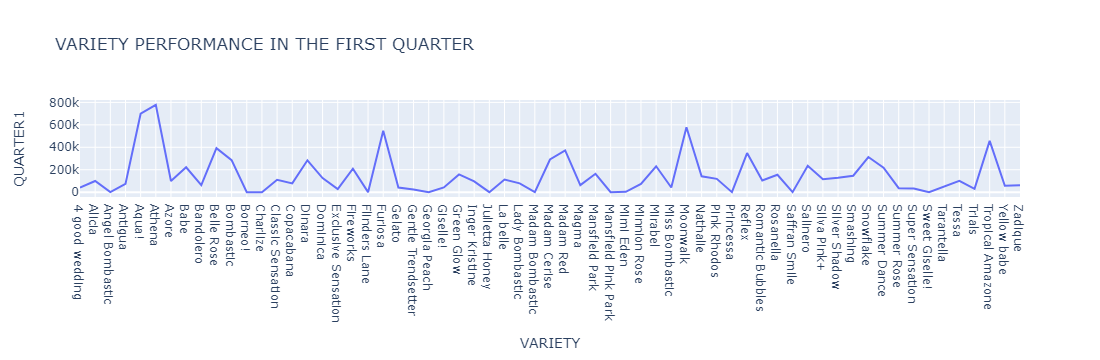

In [79]:
variety_performance=data.groupby('VARIETY')['QUARTER1'].sum().reset_index()

fig=px.line(variety_performance, x='VARIETY', y='QUARTER1', title='VARIETY PERFORMANCE IN THE FIRST QUARTER')
fig.show()

Insights
1. Athena had the highest production in the firstquarter with a total of 778, 396 in production followed closely by Moonwalk with a total of 578,615
2. Some varieties with a production of 1 were experiencin replanting while others were being uprooted
3. Madam bombastic had the lowest production of 459 in quarter1
   

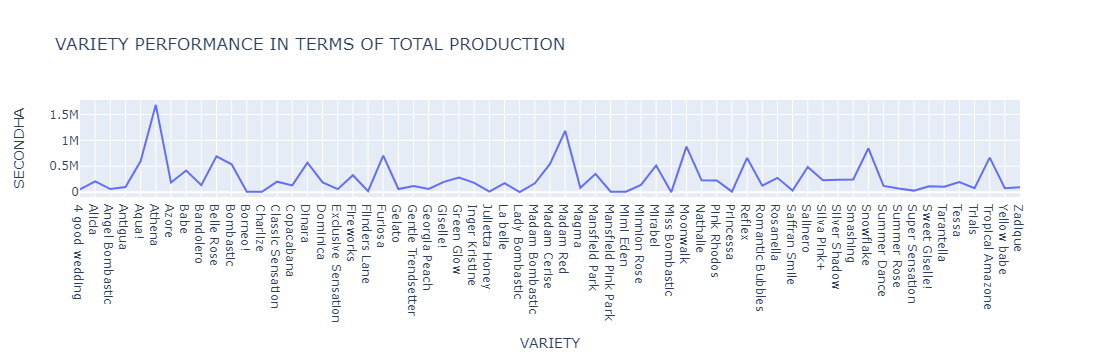

In [80]:
variety_performance=data.groupby('VARIETY')['SECONDHA'].sum().reset_index()

fig=px.line(variety_performance, x='VARIETY', y='SECONDHA', title='VARIETY PERFORMANCE IN TERMS OF TOTAL PRODUCTION')
fig.show()

Insights
1. In 2022 production of Second half for the year, Athena had the largest produce of 1.687152Million
2. It was then followed closely by Madam Red with a production of 1.185626million
3. Miss bombastic had the least production of 1 because of replanting
4. So, the second least produced variety in this half is Lay Bombastic with 1130

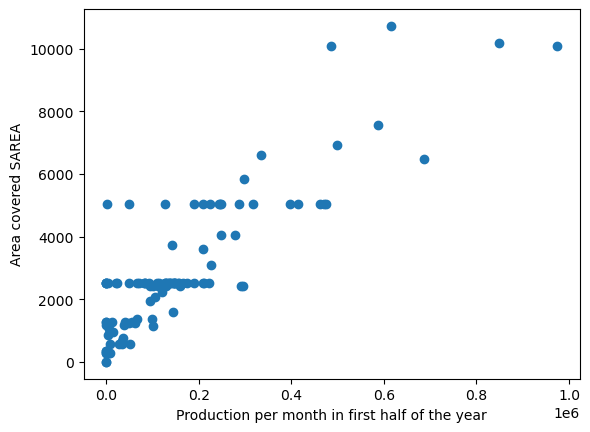

In [81]:
plt.scatter(data['FIRSTHA'], data['SAREA'])
plt.xlabel('Production per month in first half of the year')
plt.ylabel('Area covered SAREA')
plt.show()

Insights
1. The SAREA with alargest production is observed within the first three months of the first quarter thats April, May and June
2. The forth to sixth month production is mainly from GH with SAREA of 6000m2 to 10000m2
3. The forth tosixth month has no production in SAREA of less than 6000m2

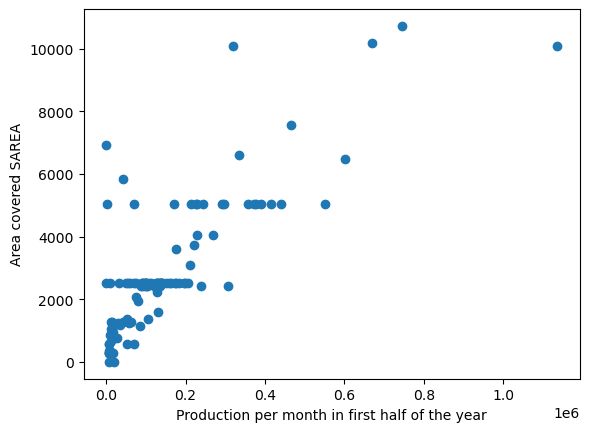

In [82]:
plt.scatter(data['SECONDHA'], data['SAREA'])
plt.xlabel('Production per month in first half of the year')
plt.ylabel('Area covered SAREA')
plt.show()

Insights
1. In the second half of the year, a lot of harvest comes from SAREA from 0 to 6000m2.
2. High production is observed in the first three months of the second half that is October, November, December
3. March has the lowest production in terms of SAREA maybe this is when they do timing.

Now that we have explored what our data entails, let's create a new dataframe from our previous dataframe to assit us in determining the most important features contributing to variety production. I will use the round() to round our data  to 2decimal places for easier understanding

In [83]:
data3 = data[["GH NO","SAREA", "NAREA", "TOTPRO", "PROD/M2", "QUARTER1", "QUARTER2", "QUARTER3", "QUARTER4", "FIRSTHA", "SECONDHA"]].copy()
print (round(data3))

     GH NO   SAREA  NAREA     TOTPRO  PROD/M2  QUARTER1  QUARTER2  QUARTER3  \
0        1  5046.0    0.0  1027655.0    204.0  262558.0  213304.0  286141.0   
1        1   292.0    0.0    25706.0     88.0    3824.0    4979.0    7795.0   
2        1   667.0    0.0    46052.0     69.0   23898.0   10003.0   12154.0   
3        1  1272.0    0.0    56871.0     45.0       1.0   13391.0   23322.0   
4        1  2523.0    0.0   120153.0     48.0       1.0   21849.0   44121.0   
..     ...     ...    ...        ...      ...       ...       ...       ...   
105     28  2422.0    0.0   197940.0     82.0   50039.0   51023.0   45791.0   
106     28  2422.0    0.0   225766.0     93.0   65967.0   56604.0   46550.0   
107     28  2422.0    0.0   531231.0    219.0  143503.0  147871.0  133592.0   
108     28  2422.0    0.0   220649.0     91.0   61851.0   54904.0   49970.0   
109     28  2422.0    0.0   244874.0    101.0   68327.0   55865.0   63524.0   

     QUARTER4   FIRSTHA  SECONDHA  
0    265656.0  

In [84]:
data3.head()

,GH NO,SAREA,NAREA,TOTPRO,PROD/M2,QUARTER1,QUARTER2,QUARTER3,QUARTER4,FIRSTHA,SECONDHA
0,1,5046.0,0.0,1027655.0,203.657352,262558.0,213304.0,286141.0,265656.0,475861.0,551796.0
1,1,292.0,0.0,25706.0,88.034247,3824.0,4979.0,7795.0,9112.0,8802.0,16906.0
2,1,667.0,0.0,46052.0,69.043478,23898.0,10003.0,12154.0,1.0,33900.0,12154.0
3,1,1272.0,0.0,56871.0,44.709906,1.0,13391.0,23322.0,20161.0,13391.0,43482.0
4,1,2523.0,0.0,120153.0,47.623068,1.0,21849.0,44121.0,54186.0,21849.0,98306.0


In [85]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GH NO     110 non-null    int64  
 1   SAREA     110 non-null    float64
 2   NAREA     110 non-null    float64
 3   TOTPRO    110 non-null    float64
 4   PROD/M2   110 non-null    float64
 5   QUARTER1  110 non-null    float64
 6   QUARTER2  110 non-null    float64
 7   QUARTER3  110 non-null    float64
 8   QUARTER4  110 non-null    float64
 9   FIRSTHA   110 non-null    float64
 10  SECONDHA  110 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 9.6 KB


The datatype of all our column is in float. Since we are going to train in a model, we will have to covert it into integers. That's what we do next.

In [86]:
data3 = data3.astype({"GH NO": 'int', "SAREA": 'int', "NAREA": 'int', "TOTPRO": 'int', "PROD/M2": 'int', "QUARTER1": 'int',"QUARTER2": 'int',"QUARTER3": 'int',"QUARTER4": 'int',"FIRSTHA": 'int',"SECONDHA": 'int' })
data3.head()

,GH NO,SAREA,NAREA,TOTPRO,PROD/M2,QUARTER1,QUARTER2,QUARTER3,QUARTER4,FIRSTHA,SECONDHA
0,1,5046,0,1027655,203,262558,213304,286141,265656,475861,551796
1,1,292,0,25706,88,3824,4979,7795,9112,8802,16906
2,1,667,0,46052,69,23898,10003,12154,1,33900,12154
3,1,1272,0,56871,44,1,13391,23322,20161,13391,43482
4,1,2523,0,120153,47,1,21849,44121,54186,21849,98306


#let's check the correniality between different variables in our data. The closer the correlation is to 1 means the two variable correlates. A negative sign means their is no correlation betwen the variables. 
data.corr()

In [87]:
data3.nunique()

GH NO        28
SAREA        40
NAREA         4
TOTPRO      105
PROD/M2      83
QUARTER1     94
QUARTER2     99
QUARTER3    102
QUARTER4    104
FIRSTHA      99
SECONDHA    109
dtype: int64

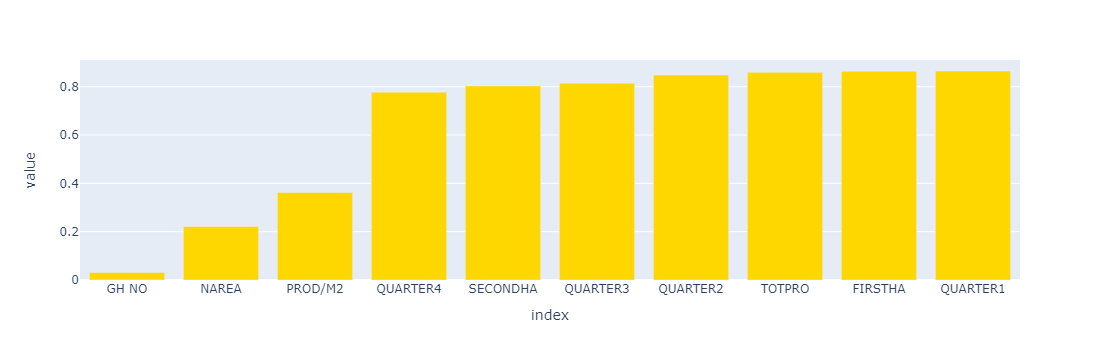

In [88]:
#let's check  how other festures correlates with the SAREA covered by variety.The closer the value is closer to 1, the closer the correlation
data3_corr_bar = abs(data3.corr()['SAREA']).sort_values()[:-1]
fig = px.bar(data3_corr_bar, orientation='v', color_discrete_sequence =['gold']*len(data3_corr_bar))
fig.update_layout(showlegend=False)
fig.show()

1. There is high correlation between the Area covered by a variety and the quarter2 production.
2. There is low correlation between GH NO and Area coverd by the variety. So, the GH NO doesn't have much effect on the AREA of a variety

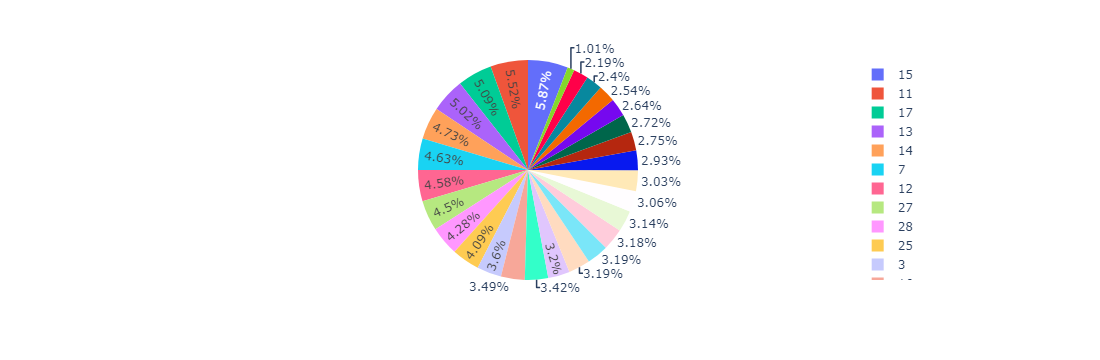

In [95]:
#Which GH NO contributes the highest percentage in production during the first half of the year

fig=px.pie(data3, values='FIRSTHA', names="GH NO")
fig.show()

1. GH NO 15 contributes the highest production of 5.87% in the FIRSTHA
2. The least performing is GH NO 24 contributing only 1.01%

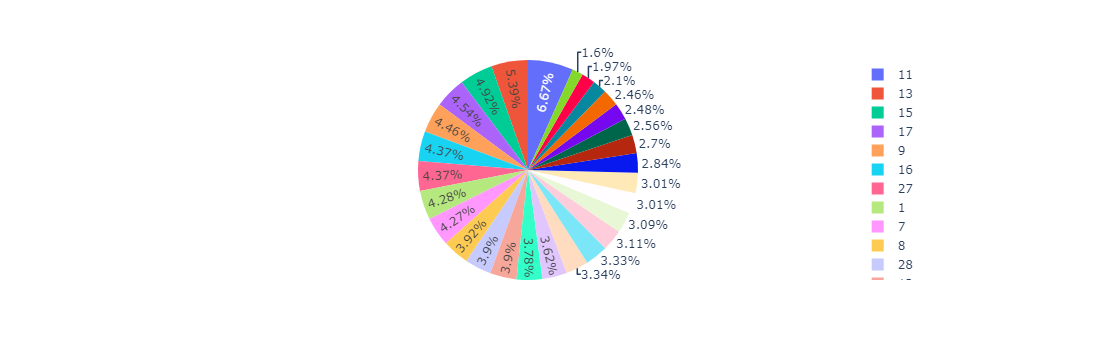

In [96]:
#Which GH NO contributes the highest percentage in production during the second half of the year

fig=px.pie(data3, values='SECONDHA', names="GH NO")
fig.show()

1. The highest performing is GH NO 11 contributing 6.67% in production
2. The least performing is GH NO 24 which contributes 1.6% in production

The next thing we are going to do is model selection and hypertuning it which will help ius find the most important features contributing to the Area of production (SAREA)

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [92]:
X= data3.drop('SAREA', axis=1)
y=data3['SAREA']

In [93]:
#split the data set to training and testing

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [94]:
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)



In [47]:
#scale the features

scaler= StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [166]:
#train and evaluate the model using logisticregression
logreg=LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
prediction= logreg.predict (X_test)

#metrics
def evaluate(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    return accuracy, precision, recall, f1

logreg_metrics = evaluate(y_test, prediction)

print("Logistic Regression Metrics - Accuracy: {}, Precision: {}, Recall: {}, F1-score: {}".format(*logreg_metrics))


Logistic Regression Metrics - Accuracy: 0.7727272727272727, Precision: 0.6525974025974026, Recall: 0.7727272727272727, F1-score: 0.703030303030303


In [167]:
#We also use Random forest to test our model

rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf_prediction=rf.predict(X_test)

#metrics
def evaluate(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    return accuracy, precision, recall, f1

rf_metrics = evaluate(y_test, rf_prediction)

print("RandomForest Regression Metrics - Accuracy: {}, Precision: {}, Recall: {}, F1-score: {}".format(*rf_metrics))

RandomForest Regression Metrics - Accuracy: 0.7727272727272727, Precision: 0.7792207792207791, Recall: 0.7727272727272727, F1-score: 0.7733932733932734


In [168]:
#we will also use support vector machines(SVM) to train our model

svc = SVC()
svc.fit(X_train, y_train)
svc_prediction = svc.predict(X_test)

#metrics
def evaluate(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    return accuracy, precision, recall, f1

SVM_metrics = evaluate(y_test, svc_prediction)

print("SVM Metrics - Accuracy: {}, Precision: {}, Recall: {}, F1-score: {}".format(*SVM_metrics))

SVM Metrics - Accuracy: 0.6818181818181818, Precision: 0.5782828282828283, Recall: 0.6818181818181818, F1-score: 0.5974921630094044


In [169]:
print("Logistic Regression Metrics - Accuracy: {}, Precision: {}, Recall: {}, F1-score: {}".format(*logreg_metrics))
print("Random Forest Metrics - Accuracy: {}, Precision: {}, Recall: {}, F1-score: {}".format(*rf_metrics))
print("SVM Metrics - Accuracy: {}, Precision: {}, Recall: {}, F1-score: {}".format(*SVM_metrics))

Logistic Regression Metrics - Accuracy: 0.7727272727272727, Precision: 0.6525974025974026, Recall: 0.7727272727272727, F1-score: 0.703030303030303
Random Forest Metrics - Accuracy: 0.7727272727272727, Precision: 0.7792207792207791, Recall: 0.7727272727272727, F1-score: 0.7733932733932734
SVM Metrics - Accuracy: 0.6818181818181818, Precision: 0.5782828282828283, Recall: 0.6818181818181818, F1-score: 0.5974921630094044



The best performing model is Random Forest Metrics with an accuracy score of 0.7727, and precision of 0.7792. So, we will use Random Forest Metrics as our baseline model.


Next, thing is to Optimize the models' performance by tuning their hyperparameters using techniques like grid search or random search.

In [131]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# Metrics
def evaluate(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    return accuracy, precision, recall, f1

rf_metrics = evaluate(y_test, rf_preds)
print("Baseline Random Forest Metrics - Accuracy: {}, Precision: {}, Recall: {}, F1-score: {}".format(*rf_metrics))



Baseline Random Forest Metrics - Accuracy: 0.7272727272727273, Precision: 0.7727272727272727, Recall: 0.7272727272727273, F1-score: 0.7489177489177489


In [181]:
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
best_params = grid_search.best_params_


Fitting 2 folds for each of 100 candidates, totalling 200 fits


In [182]:
rf_optimized = RandomForestClassifier(**best_params)
rf_optimized.fit(X_train, y_train)
rf_optimized_preds = rf_optimized.predict(X_test)

rf_optimized_metrics = evaluate(y_test, rf_optimized_preds)
print("Optimized Random Forest Metrics - Accuracy: {}, Precision: {}, Recall: {}, F1-score: {}".format(*rf_optimized_metrics))

Optimized Random Forest Metrics - Accuracy: 0.7727272727272727, Precision: 0.75, Recall: 0.7727272727272727, F1-score: 0.7554112554112554


In [183]:
important_features = pd.Series(rf_optimized.feature_importances_, index=X.columns)
important_features = important_features.sort_values(ascending=False)
important_features.head(10)

GH NO       0.209062
QUARTER4    0.197236
QUARTER1    0.128041
QUARTER2    0.115486
PROD/M2     0.079389
TOTPRO      0.072021
QUARTER3    0.067530
FIRSTHA     0.061817
SECONDHA    0.054418
NAREA       0.014999
dtype: float64

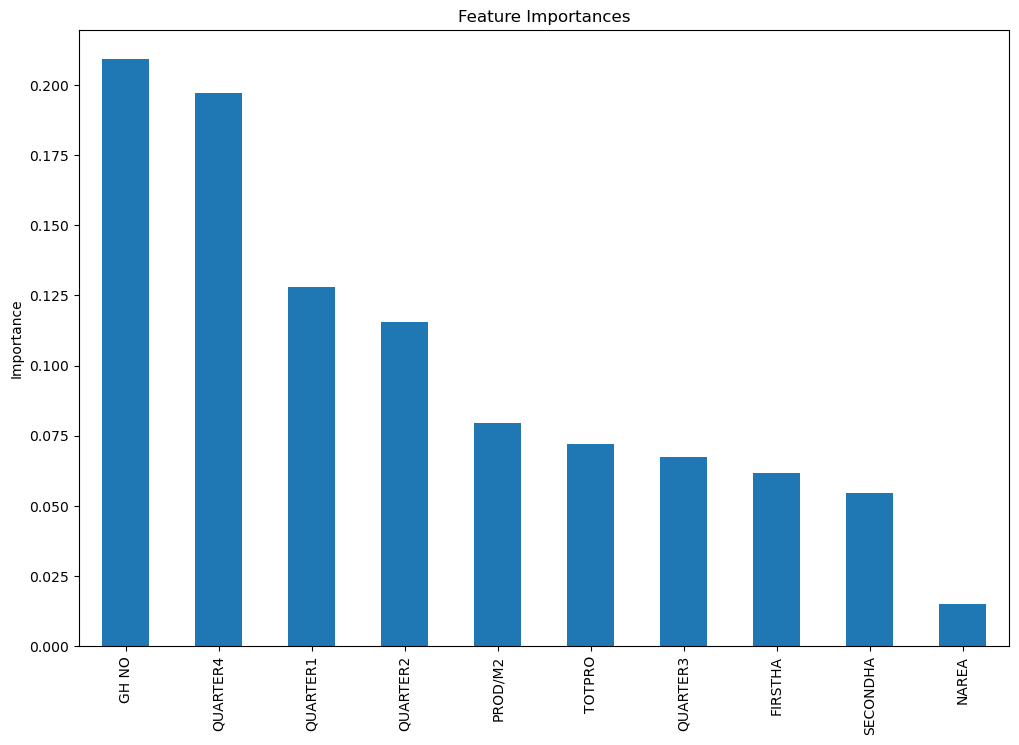

In [184]:
important_features.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), ylabel='Importance', title='Feature Importances')
plt.show()